In [9]:
# Importing necessary libraries for model loading and image processing
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Setting NumPy print options for better readability
# Suppresses scientific notation in NumPy arrays
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/drive/MyDrive/Capstone Project/converted_keras/keras_model.h5", compile=False)

# Read class names
class_names = open("/content/drive/MyDrive/Capstone Project/converted_keras/labels.txt", "r").readlines()

# Preparing a NumPy array with the shape required by the Keras model for input
# Only 1 image can go into the array
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Loading and processing the image for model prediction
image = Image.open("/content/drive/MyDrive/Capstone Project/PetFacialDataset/archive (1)/happy/001.jpg").convert("RGB")

#  Resizing the image to 224x224 to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# Converting the image into a numpy array
image_array = np.asarray(image)

# Normalizing the image data
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Makes a prediction using the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 998ms/step
Class: Happy
Confidence Score: 0.99953306


<dtype: 'uint8'>


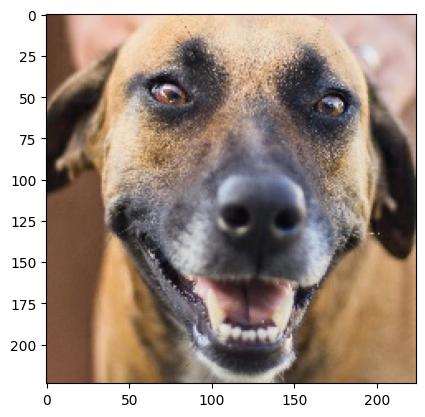

In [10]:
# Importing necessary libraries and modules
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt

# Suppressing warnings for cleaner output
filterwarnings("ignore")

# Reading an image file using TensorFlow
tf_img = io.read_file("/content/drive/MyDrive/Capstone Project/PetFacialDataset/archive (1)/happy/001.jpg")

# Decoding the image file (PNG format) into a tensor and setting the number of color channels to 3 (RGB)
tf_img = image.decode_png(tf_img, channels=3)

print(tf_img.dtype)
plt.imshow(tf_img)
# plt.show()
